Install Libraries

In [1]:
pip install pandas seaborn matplotlib scikit-learn numpy xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline

In [65]:
# Load the datasets
df = pd.read_csv('./data/treated/biggerAugmentedData.csv')

In [4]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                 0
AGE                        0
GENDER                     0
VETERAN                    0
INCOME                     0
NIGHTS                     0
substanceabuse             0
completed                  0
probation                  0
assistancetype             0
required                   0
AT_RISK_OF_HOMELESSNESS    0
INCOME_PER_NIGHT           0
AGE_GROUP                  0
dtype: int64


In [5]:
df.head()

,Unnamed: 0,AGE,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required,AT_RISK_OF_HOMELESSNESS,INCOME_PER_NIGHT,AGE_GROUP
0,0,56,Female,No,47500,208,1,0,0,noassistance,1,0,228.37,56-70
1,1,69,Male,No,12500,254,0,1,1,tempassistance,0,0,49.21,56-70
2,2,46,Female,No,40000,221,0,1,1,permassistance,0,0,181.00,41-55
3,3,32,Male,No,0,262,1,0,0,noassistance,0,0,0.00,26-40
4,4,60,Female,No,30000,331,0,1,0,tempassistance,1,0,90.63,56-70


In [66]:
# Replace 'inf' values with NaN to handle them as missing values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df['VETERAN'] = df['VETERAN'].apply(lambda x: 1 if x == 'Yes' else 0)
df['GENDER'] = df['GENDER'].apply(lambda x: 1 if x == 'Female' else 0)

assistancetype_mapping = {
    'noassistance': 0,
    'tempassistance': 1,
    'permassistance': 2,
}

# Use the map function to apply the mapping to the AGE_GROUP column
df['assistancetype'] = df['assistancetype'].map(assistancetype_mapping)

age_group_mapping = {
    '18-25': 0,
    '26-40': 1,
    '41-55': 2,
    '56-70': 3
}

# Use the map function to apply the mapping to the AGE_GROUP column
df['AGE_GROUP'] = df['AGE_GROUP'].map(age_group_mapping)

In [7]:
df.head()

,Unnamed: 0,AGE,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required,AT_RISK_OF_HOMELESSNESS,INCOME_PER_NIGHT,AGE_GROUP
0,0,56,1,0,47500,208,1,0,0,0,1,0,228.37,3
1,1,69,0,0,12500,254,0,1,1,1,0,0,49.21,3
2,2,46,1,0,40000,221,0,1,1,2,0,0,181.00,2
3,3,32,0,0,0,262,1,0,0,0,0,0,0.00,1
4,4,60,1,0,30000,331,0,1,0,1,1,0,90.63,3


In [67]:
# Randomize the dataset
df = df.sample(frac=1).reset_index(drop=True)

In [41]:
df.columns

Index(['Unnamed: 0', 'AGE', 'GENDER', 'VETERAN', 'INCOME', 'NIGHTS',
       'substanceabuse', 'completed', 'probation', 'assistancetype',
       'required', 'AT_RISK_OF_HOMELESSNESS', 'INCOME_PER_NIGHT', 'AGE_GROUP'],
      dtype='object')

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Assume 'df' is your DataFrame and 'features' contains the column names you want to scale
features = ['AGE', 'INCOME', 'NIGHTS', 'INCOME_PER_NIGHT']  # Add all features you want to scale

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Scale the features and replace in the dataframe
df[features] = scaler.fit_transform(df[features])


In [72]:
#df = df.drop('AGE', axis= 1)
df = df.drop('Unnamed: 0', axis= 1)

In [73]:
df.head()

,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required,AT_RISK_OF_HOMELESSNESS,INCOME_PER_NIGHT,AGE_GROUP
0,1,1,0.322633,-0.854569,0,0,0,0,1,0,-0.039520,1
1,0,0,-0.412908,-0.929963,0,0,1,1,0,0,-0.129035,0
2,0,0,1.517887,0.841804,1,1,0,1,0,0,-0.122270,0
3,1,0,-0.045138,-0.977085,1,0,0,0,1,1,-0.063417,1
4,1,0,-1.209745,0.898350,1,0,1,0,0,0,-0.247459,3


In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [75]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix

,Unnamed: 0,AGE,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required,AT_RISK_OF_HOMELESSNESS,INCOME_PER_NIGHT,AGE_GROUP
Unnamed: 0,1.000000,-0.010360,-0.013882,0.008570,-0.007529,0.013600,0.017295,-0.010350,0.009397,0.027127,0.005615,0.006439,0.000610,-0.012795
AGE,-0.010360,1.000000,0.013995,0.011639,-0.025195,-0.008816,0.009463,-0.005807,0.001995,-0.001012,-0.002197,-0.000041,-0.012492,0.961714
GENDER,-0.013882,0.013995,1.000000,-0.002629,-0.011644,0.008665,-0.017039,0.023991,-0.002260,-0.008879,0.000224,-0.007461,0.007354,0.010488
VETERAN,0.008570,0.011639,-0.002629,1.000000,0.007541,-0.012628,0.015704,-0.012900,0.014072,-0.026751,-0.024978,0.357256,-0.001164,0.010055
INCOME,-0.007529,-0.025195,-0.011644,0.007541,1.000000,-0.007228,0.002850,0.008843,-0.014578,0.014267,0.023607,-0.009728,0.197036,-0.030033
NIGHTS,0.013600,-0.008816,0.008665,-0.012628,-0.007228,1.000000,0.009215,-0.005827,-0.018922,0.004528,-0.021629,-0.032140,-0.283695,-0.013240
substanceabuse,0.017295,0.009463,-0.017039,0.015704,0.002850,0.009215,1.000000,0.015830,-0.003470,0.001198,-0.008834,-0.014000,-0.004634,0.013326
completed,-0.010350,-0.005807,0.023991,-0.012900,0.008843,-0.005827,0.015830,1.000000,-0.008446,0.000293,-0.002609,0.000806,0.003524,-0.008625
probation,0.009397,0.001995,-0.002260,0.014072,-0.014578,-0.018922,-0.003470,-0.008446,1.000000,0.014528,0.012913,0.016633,0.033249,0.001183
assistancetype,0.027127,-0.001012,-0.008879,-0.026751,0.014267,0.004528,0.001198,0.000293,0.014528,1.000000,-0.009833,0.002729,0.008912,0.004442


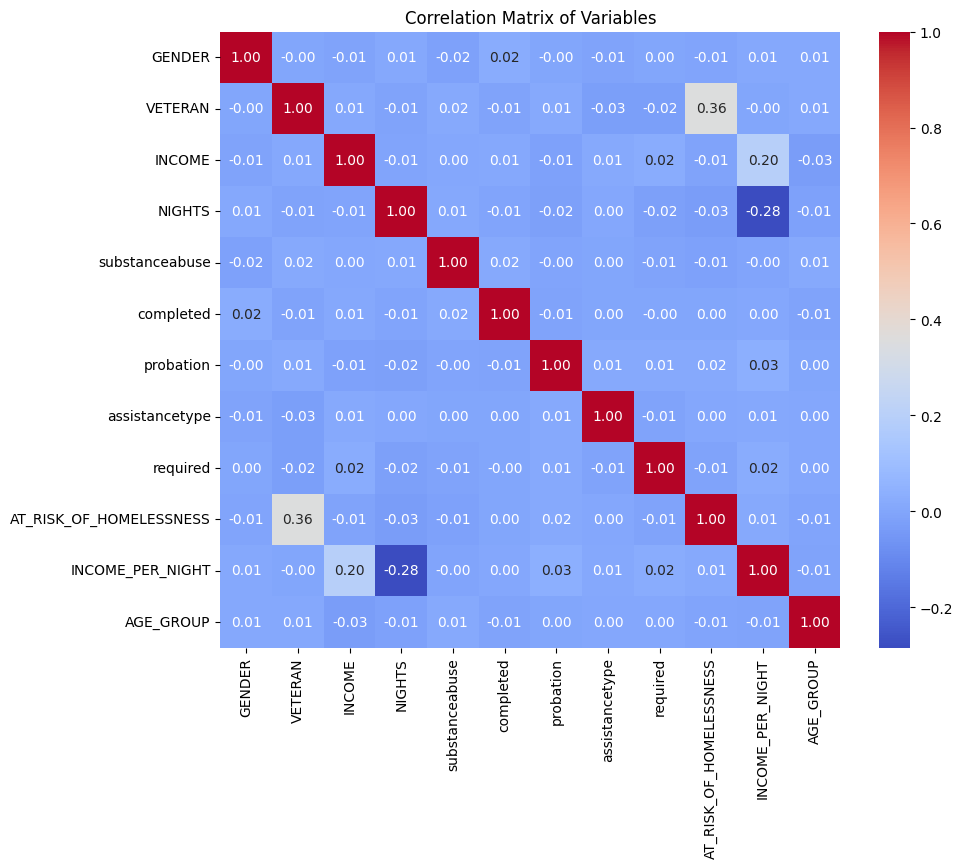

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame
X = df.drop(['AT_RISK_OF_HOMELESSNESS'], axis=1)
y = df['AT_RISK_OF_HOMELESSNESS']

# Identifying categorical and numeric features
categorical_features = []
numeric_features = [col for col in X.columns if col not in categorical_features]

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Simple Logistic Regression

In [79]:
# Combine preprocessor and model into a single pipeline
model_pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, random_state=42))

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
cv_scores = cross_val_score(model_pipeline, X, y, cv=kf, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average CV Score: {np.mean(cv_scores):.4f}")

Cross-Validation Scores: [0.863 0.857 0.861 0.867 0.853]
Average CV Score: 0.8602


In [80]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from sklearn.base import clone
import numpy as np

def evaluate_model(model_pipeline, X, y, cv=5):
    """
    Evaluates a model pipeline using cross-validation and prints out average ROC-AUC, F1, Precision, and Recall scores.

    Parameters:
    - model_pipeline: The modeling pipeline that ends with a classifier.
    - X: Feature matrix.
    - y: Target vector.
    - cv: Number of cross-validation folds.

    Returns:
    - A dictionary with average scores for ROC-AUC, F1, Precision, and Recall.
    """
    
    # Initialize KFold and lists to store metrics
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    auc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []

    # Perform cross-validation
    for train_index, test_index in kf.split(X):
        # Clone the model pipeline for a fresh model each fold
        clone_model = clone(model_pipeline)
        
        # Split the data
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        
        # Fit the model
        clone_model.fit(X_train_fold, y_train_fold)
        
        # Make predictions
        y_pred_fold = clone_model.predict(X_test_fold)
        y_pred_proba_fold = clone_model.predict_proba(X_test_fold)[:, 1]
        
        # Calculate and store the metrics
        auc_scores.append(roc_auc_score(y_test_fold, y_pred_proba_fold))
        f1_scores.append(f1_score(y_test_fold, y_pred_fold))
        precision_scores.append(precision_score(y_test_fold, y_pred_fold))
        recall_scores.append(recall_score(y_test_fold, y_pred_fold))

    # Calculate average scores
    avg_scores = {
        'ROC-AUC': np.mean(auc_scores),
        'F1': np.mean(f1_scores),
        'Precision': np.mean(precision_scores),
        'Recall': np.mean(recall_scores)
    }
    
    # Optionally, print the average scores
    for score_name, score_value in avg_scores.items():
        print(f"Average {score_name} Score: {score_value:.4f}")
    
    return avg_scores

# # Example of using the function with a logistic regression pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# # Sample pipeline for demonstration
# sample_pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# # Invoke the evaluation function
# # Ensure X and y are defined and hold your features and target variable, respectively
# scores = evaluate_model(sample_pipeline, X, y, cv=5)


Optimized Logistic Regression:

In [81]:
# Create a complete pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=100))])

# Define a grid of parameters to search over
param_grid = {
    'classifier__C': [40, 100, 500],
    'classifier__solver': ['liblinear', 'lbfgs']
}

# Set up the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

best_lr_model = grid_search.best_estimator_
evaluate_model(best_lr_model, X, y, cv=5)

# Make predictions with the best found parameters
y_pred = grid_search.predict(X_test)

Best parameters: {'classifier__C': 40, 'classifier__solver': 'liblinear'}
Best CV score: 0.85975
Average ROC-AUC Score: 0.6512
Average F1 Score: 0.3081
Average Precision Score: 0.5029
Average Recall Score: 0.2253


In [82]:
# Assuming 'best_pipeline' is your fitted pipeline object that includes the logistic regression model
classifier = best_lr_model.named_steps['classifier']  # Access the logistic regression step

# Assuming 'X' is your feature matrix DataFrame used in model fitting
# Make sure 'X' reflects the preprocessed data structure that the model was trained on
feature_names = X.columns  # Feature names as they appear after preprocessing, before fitting the model

# Coefficients from the logistic regression model within the pipeline
coefficients = classifier.coef_[0]

# Create DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)  # Sorting by absolute value

print(feature_importances)

             Feature  Coefficient
1            VETERAN     0.677897
4     substanceabuse    -0.076976
3             NIGHTS    -0.076353
6          probation     0.067205
2             INCOME    -0.054010
0             GENDER    -0.053000
7     assistancetype     0.052276
9   INCOME_PER_NIGHT     0.043002
8           required     0.022545
10         AGE_GROUP    -0.017990
5          completed     0.016944


/var/folders/tp/3wd6yzls5mn3qq9p_wh49y5r0000gn/T/ipykernel_62794/2716860152.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=logistic_regression_df, palette="vlag")


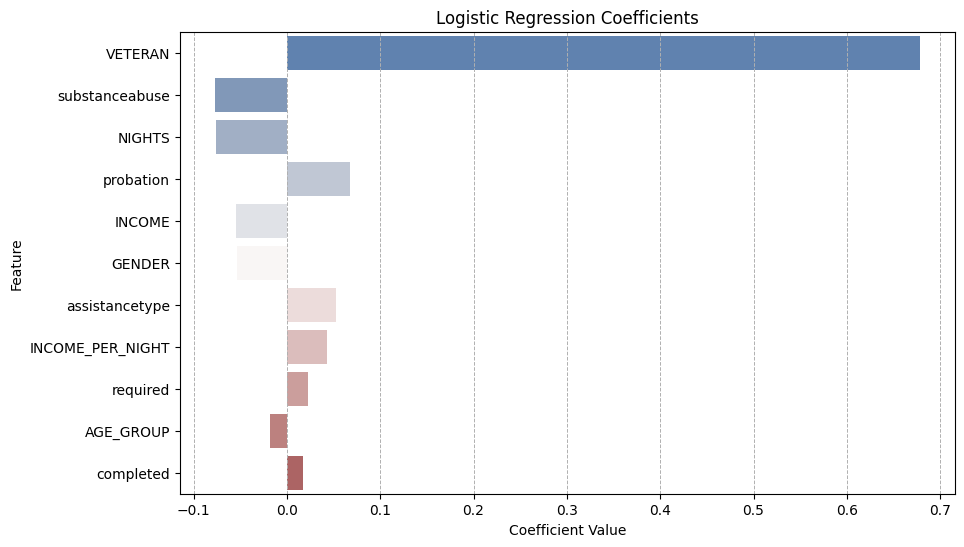

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Create a dataframe for logistic regression coefficients
logistic_regression_df = pd.DataFrame({
    'Feature': ['VETERAN', 'AGE_GROUP', 'INCOME_PER_NIGHT', 'INCOME', 'probation', 
                'substanceabuse', 'NIGHTS', 'completed', 'GENDER', 'required', 
                'assistancetype'],
    'Coefficient': [0.677897, -0.017990, 0.043002, -0.054010, 0.067205, 
                    -0.076976, -0.076353, 0.016944, -0.053000, 0.022545, 
                    0.052276]
})

# Sort the dataframe by the absolute values of coefficients
logistic_regression_df = logistic_regression_df.reindex(
    logistic_regression_df.Coefficient.abs().sort_values(ascending=False).index
)

# Visualization for Logistic Regression Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=logistic_regression_df, palette="vlag")
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.show()



/var/folders/tp/3wd6yzls5mn3qq9p_wh49y5r0000gn/T/ipykernel_62794/1991712803.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=logistic_regression_df, palette="vlag")


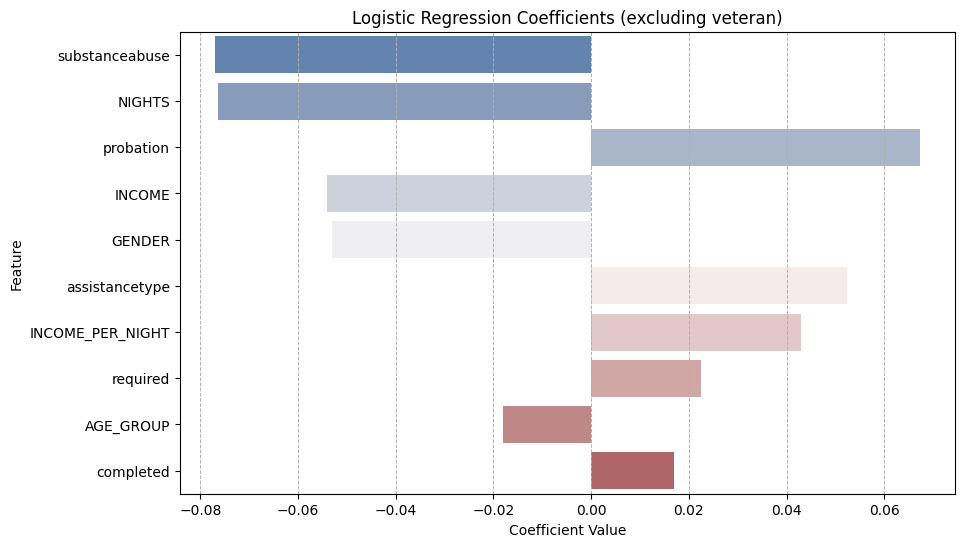

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Create a dataframe for logistic regression coefficients
logistic_regression_df = pd.DataFrame({
    'Feature': ['AGE_GROUP', 'INCOME_PER_NIGHT', 'INCOME', 'probation', 
                'substanceabuse', 'NIGHTS', 'completed', 'GENDER', 'required', 
                'assistancetype'],
    'Coefficient': [-0.017990, 0.043002, -0.054010, 0.067205, 
                    -0.076976, -0.076353, 0.016944, -0.053000, 0.022545, 
                    0.052276]
})

# Sort the dataframe by the absolute values of coefficients
logistic_regression_df = logistic_regression_df.reindex(
    logistic_regression_df.Coefficient.abs().sort_values(ascending=False).index
)

# Visualization for Logistic Regression Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=logistic_regression_df, palette="vlag")
plt.title('Logistic Regression Coefficients (excluding veteran)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.show()

Support Vector Machine (SVM):

In [85]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Adjusting the pipeline to enable probability estimation in SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True))  # Enable probability estimation
])

param_grid = {
    'svc__C': [0.007, 0.01, 0.1],  # Regularization strength
    'svc__kernel': ['linear']  # Kernel type (add  'rbf')
}

# Set up the grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

best_svm_model = grid_search.best_estimator_
evaluate_model(best_svm_model, X, y, cv=5)

Best parameters: {'svc__C': 0.1, 'svc__kernel': 'linear'}
Best CV score: 0.85775
Average ROC-AUC Score: 0.6411
Average F1 Score: 0.3252
Average Precision Score: 0.3972
Average Recall Score: 0.2758


/Users/hamza/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'ROC-AUC': 0.6411116906178241,
 'F1': 0.32520776483333613,
 'Precision': 0.3972067375007712,
 'Recall': 0.27575318507597935}

In [86]:
# Assuming linear kernel and you want to extract coefficients
best_svm_model = grid_search.best_estimator_['svc']
coefs = best_svm_model.coef_.flatten()  # Flatten if it's multi-class

# Feature names (assuming all numeric or you've manually encoded categories)
feature_names = X.columns

# Creating a DataFrame for easier interpretation
svm_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(svm_feature_importance)

             Feature  Coefficient
1            VETERAN     0.598649
6          probation    -0.000078
0             GENDER    -0.000058
7     assistancetype    -0.000049
2             INCOME     0.000027
8           required    -0.000023
5          completed    -0.000015
9   INCOME_PER_NIGHT     0.000015
10         AGE_GROUP    -0.000012
3             NIGHTS    -0.000009
4     substanceabuse     0.000007


/var/folders/tp/3wd6yzls5mn3qq9p_wh49y5r0000gn/T/ipykernel_62794/3946977039.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=svm_df, palette="vlag")


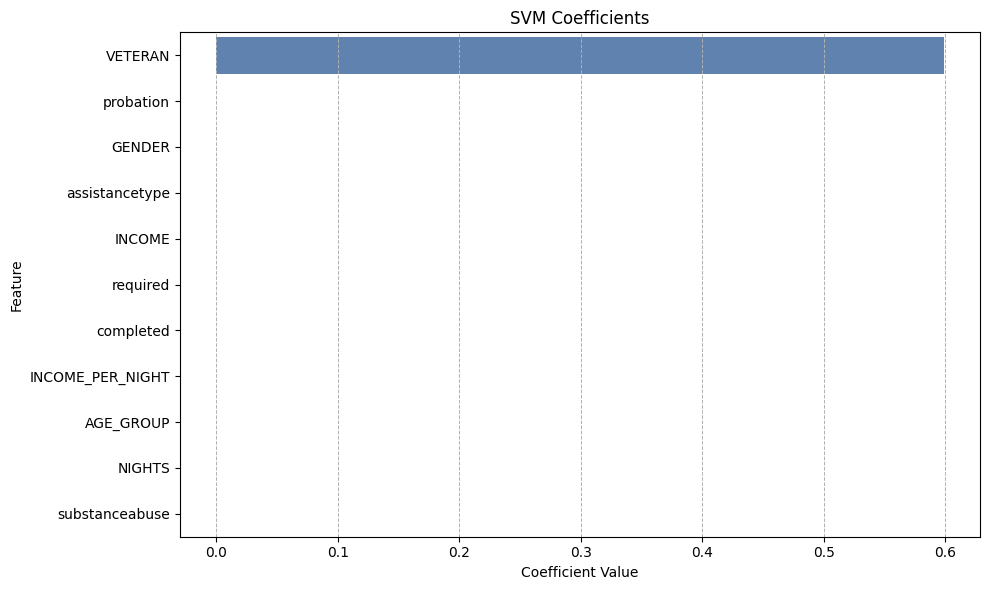

In [87]:
# Create a dataframe for SVM coefficients
svm_df = pd.DataFrame({
    'Feature': ['VETERAN', 'AGE_GROUP', 'INCOME', 'required', 
                'probation', 'assistancetype', 'completed', 'INCOME_PER_NIGHT', 
                'substanceabuse', 'GENDER', 'NIGHTS'],
    'Coefficient': [0.598649, -0.000012, 0.000027, -0.000023, 
                    -0.000078, -0.000049, -0.000015, 0.000015, 
                    0.000007, -0.000058, -0.000009]
})

# Sort the dataframe by the absolute values of coefficients
svm_df = svm_df.reindex(
    svm_df.Coefficient.abs().sort_values(ascending=False).index
)

# Visualization for SVM Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=svm_df, palette="vlag")
plt.title('SVM Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()  # Adjust the plot to ensure proper display
plt.show()



/var/folders/tp/3wd6yzls5mn3qq9p_wh49y5r0000gn/T/ipykernel_62794/1218321274.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=svm_df, palette="vlag")


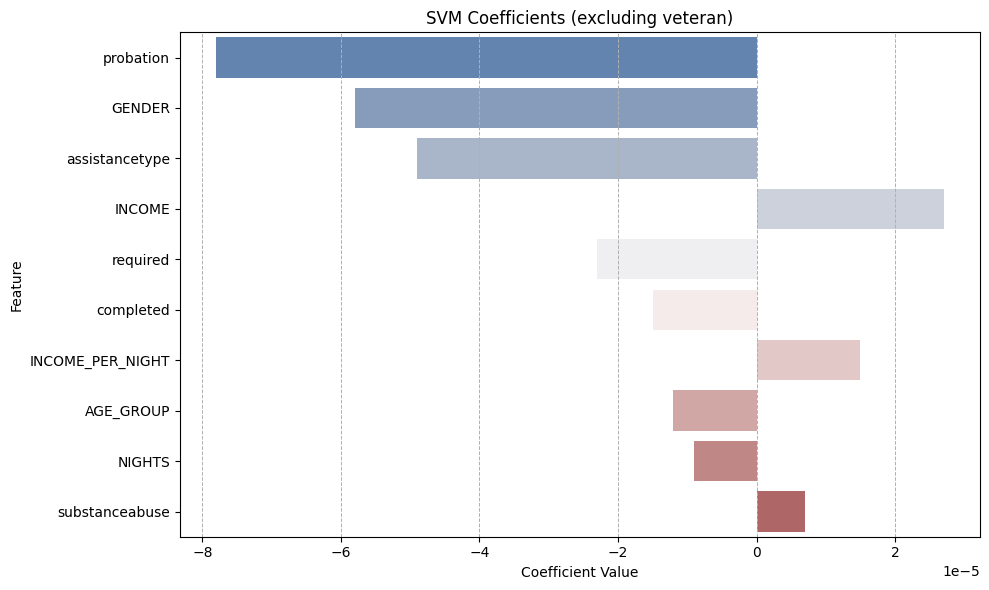

In [88]:
# Create a dataframe for SVM coefficients
svm_df = pd.DataFrame({
    'Feature': ['AGE_GROUP', 'INCOME', 'required', 
                'probation', 'assistancetype', 'completed', 'INCOME_PER_NIGHT', 
                'substanceabuse', 'GENDER', 'NIGHTS'],
    'Coefficient': [-0.000012, 0.000027, -0.000023, 
                    -0.000078, -0.000049, -0.000015, 0.000015, 
                    0.000007, -0.000058, -0.000009]
})

# Sort the dataframe by the absolute values of coefficients
svm_df = svm_df.reindex(
    svm_df.Coefficient.abs().sort_values(ascending=False).index
)

# Visualization for SVM Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=svm_df, palette="vlag")
plt.title('SVM Coefficients (excluding veteran)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()  # Adjust the plot to ensure proper display
plt.show()

Random Forests:

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [40, 50, 60],  # Number of trees
    'max_depth': [18, 20, 22]  # Maximum depth of the trees
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
evaluate_model(best_rf_model, X, y, cv=5)


Best parameters: {'max_depth': 22, 'n_estimators': 40}
Best CV score: 0.8602000000000001
Average ROC-AUC Score: 0.6577
Average F1 Score: 0.2712
Average Precision Score: 0.4929
Average Recall Score: 0.1880


{'ROC-AUC': 0.6576585597583906,
 'F1': 0.27124281676641926,
 'Precision': 0.49287192339823915,
 'Recall': 0.18797766849113343}

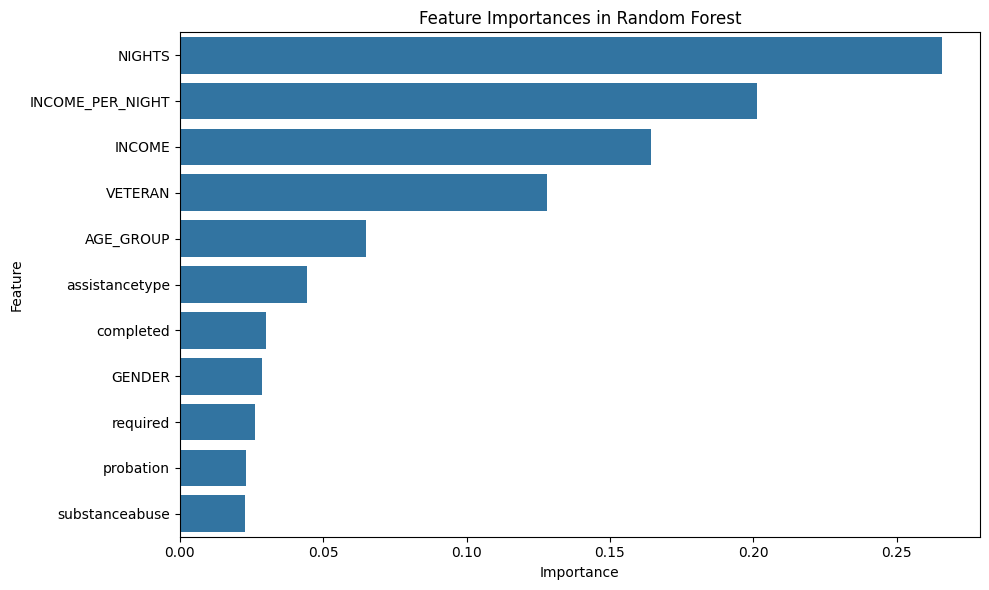

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'best_rf_model' is your trained Random Forest model and 'X' is your dataset.
feature_importances = best_rf_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importances
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting the Feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()  # Adjust the plot to ensure proper display
plt.show()

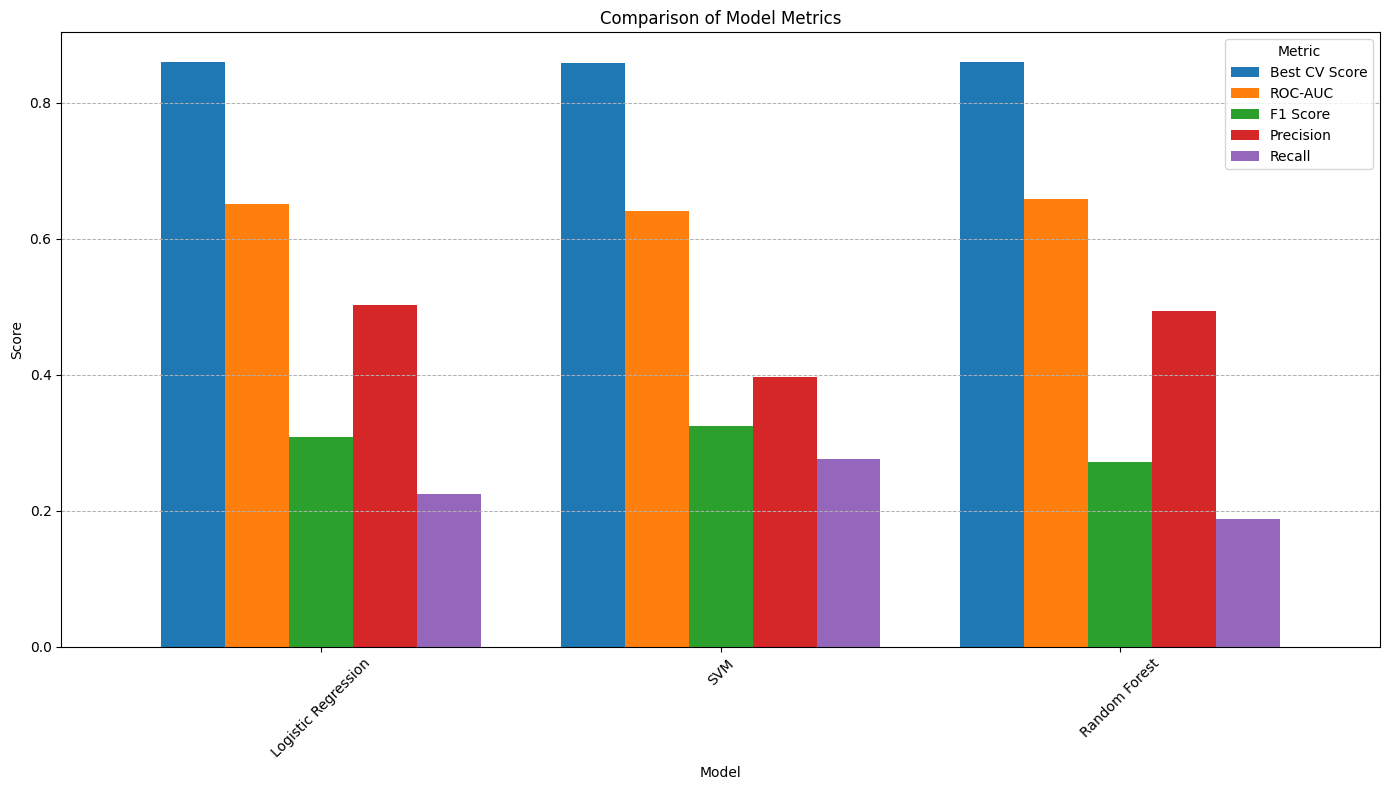

In [105]:
# Let's create a DataFrame from the metrics provided for each model and then visualize them in a bar chart.

# Metrics for each model
model_metrics = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
    'Best CV Score': [0.85975, 0.85775, 0.8602],
    'ROC-AUC': [0.6512, 0.6411, 0.6577],
    'F1 Score': [0.3081, 0.3252, 0.2712],
    'Precision': [0.5029, 0.3972, 0.4929],
    'Recall': [0.2253, 0.2758, 0.1880]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Setting 'Model' as index for better plotting
metrics_df.set_index('Model', inplace=True)

# Plot the metrics for comparison
ax = metrics_df.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Comparison of Model Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)  # Rotate model names for better visibility
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Metric')
plt.tight_layout()  # Adjust the plot to ensure proper display
plt.show()


Gradient Boosting Machines (e.g., XGBoost):

In [92]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],  # Number of gradient boosted trees
    'max_depth': [3, 6, 9],  # Maximum tree depth
    'learning_rate': [0.01, 0.1]  # Learning rate
}

grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

best_xgb_model = grid_search.best_estimator_
evaluate_model(best_xgb_model, X, y, cv=5)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best CV score: 0.8635999999999999
Average ROC-AUC Score: 0.6753
Average F1 Score: 0.2769
Average Precision Score: 0.5017
Average Recall Score: 0.1932


{'ROC-AUC': 0.6752898552806741,
 'F1': 0.27694156436313244,
 'Precision': 0.5016861944701685,
 'Recall': 0.1932198646251702}

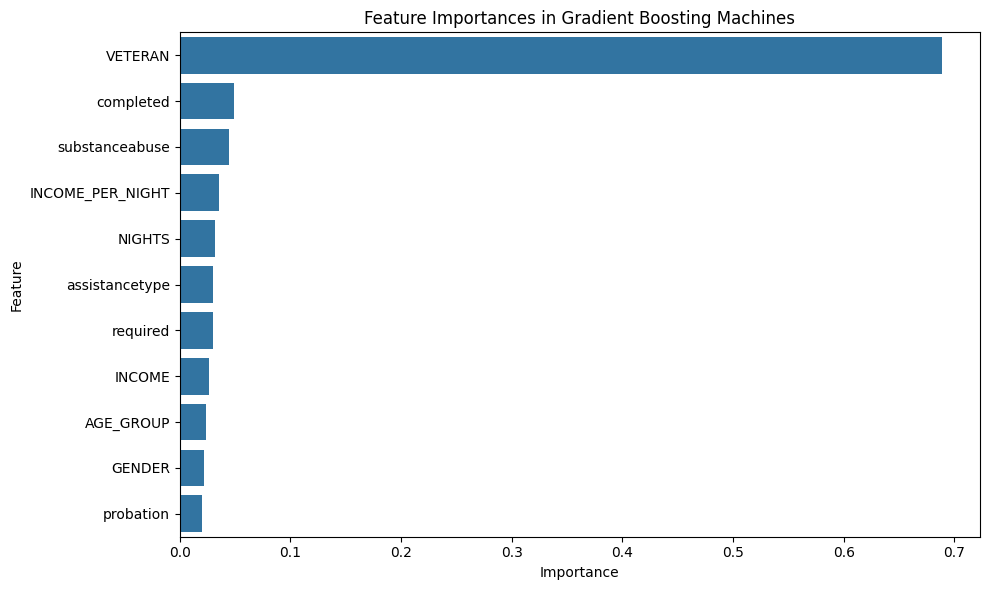

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'best_xgb_model' is your trained XGBoost model and 'X' contains the feature names.
feature_importances = best_xgb_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importances
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting the Feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in Gradient Boosting Machines')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()  # Adjust the plot to ensure proper display
plt.show()


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'best_xgb_model' is your trained XGBoost model and 'X' contains the feature names.
feature_importances = best_xgb_model.feature_importances_

features = X.columns

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

print(importances_df)
importances_df = importances_df.drop('1', axis= 0)

# Sort the DataFrame by importances
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting the Feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in Gradient Boosting Machines')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()  # Adjust the plot to ensure proper display
plt.show()

             Feature  Importance
0             GENDER    0.021807
1            VETERAN    0.688792
2             INCOME    0.026093
3             NIGHTS    0.031437
4     substanceabuse    0.044289
5          completed    0.048599
6          probation    0.020211
7     assistancetype    0.030217
8           required    0.029576
9   INCOME_PER_NIGHT    0.035255
10         AGE_GROUP    0.023724


KeyError: "['1'] not found in axis"

DNN

In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

def create_complex_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        
        # First block
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Second block
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Third block
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Fourth block
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Fifth block
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Sixth block
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Adjusting the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),  # Adding dropout
    Dense(32, activation='relu'),
    Dropout(0.5),  # Adding another dropout layer
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Setting up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Evaluate the adjusted model
evaluation = model.evaluate(X_test_scaled, y_test)

print(f'Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}')

Epoch 1/100


/Users/hamza/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6591 - loss: 0.6474 - val_accuracy: 0.8687 - val_loss: 0.3757
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8466 - loss: 0.4505 - val_accuracy: 0.8687 - val_loss: 0.3570
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8580 - loss: 0.4284 - val_accuracy: 0.8687 - val_loss: 0.3485
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8591 - loss: 0.4159 - val_accuracy: 0.8687 - val_loss: 0.3442
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8533 - loss: 0.4137 - val_accuracy: 0.8687 - val_loss: 0.3436
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8549 - loss: 0.4007 - val_accuracy: 0.8687 - val_loss: 0.3406
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.8565 - loss: 0.4099 - val_accuracy: 0.8687 - val_loss: 0.3405
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8497 - loss: 0.4010 - val_accuracy: 0.86

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers, models

# Assuming 'X' is your feature matrix DataFrame used in model fitting
# Assuming 'y' is your target vector
model = create_model((X.shape[1],), 1)  # Assuming 2 classes
# Define the model architecture
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=20, batch_size=16)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Epoch 1/20


/Users/hamza/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/hamza/Library/Python/3.9/lib/python/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1433 - loss: 280.9431
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1363 - loss: 44.7873
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1379 - loss: 12.4805
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1421 - loss: 4.2859
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1451 - loss: 2.3557
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1356 - loss: 1.6488
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1372 - loss: 0.8565
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1396 - loss: 0.7564
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1392 - loss: 0.7382
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1358 - loss: 0.7769
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1362 - loss: 0.6561
Epoch 12/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accu

/Users/hamza/Library/Python/3.9/lib/python/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1408 - loss: 0.4064
Loss: 0.4043
Accuracy: 0.1396


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model